

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Angel Joseph Vargas Martinez


# Introducción
Un sistema es cualquier “caja” (real o abstracta) que recibe una señal de entrada ($x[n]$) y produce una señal de salida ($y[n]$). Para ser considerado un sistema LTI tiene que cumplir con las siguientes propiedades:
### Linealidad 
Cumple superposición:
                                                $$x[a]=y[a]$$                             $$x[b]=y[b]$$

y tambien al multiplicar por un escalar tambien modifica su salida
$$x[B.a]=y[B.a]$$
$$B.x[a]=B.y[a]$$

### Invariancia en el tiempo
Si desplazo la entrada, la salida también se desplaza igual:

$$
x[n] =y[n]
$$

$$
x[n - n_0] = y[n - n_0]
$$
## Respuesta al impulso

El secreto de los sistemas LTI es que están completamente descritos por su respuesta al impulso $h[n]$:

$$
y[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

Esto se lo conoce como convolución, por lo cual si conozco cómo responde el sistema a un impulso $(h)$, puede predecir la salida a cualquier señal.
La respuesta al impulso $h[n]$ va a ser la salida del cuando la entrada es:$$
x[n] = \delta[n], \quad 
\delta[n] =
\begin{cases} 
1, & \text{si } n=0 \\ 
0, & \text{si } n≠0
\end{cases}
$$


En esta parte del código defino las librerías y las funciones que voy a utilizar, siendo sen la función de una senoidal, modu la señal modulada, cuad la señal cuadrada

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
def energia(y):
    y = np.asarray(y, dtype=float)
    return np.sum(y**2)

def potencia_media(y):
    y = np.asarray(y, dtype=float)
    return np.sum(y**2)/len(y)

def report_pe(titulo, fs, N, y):
    T = N/fs
    print(f"{titulo}: Fs={fs} Hz, T={T:.6f} s, Energía={energia(y):.6g}, Potencia media={potencia_media(y):.6g}")

def sen(ff, nn,vmax=1, dc=0, ph=0, fs=2):
    
    tt = np.arange(0,nn)/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    
    return tt, xx

def modu(fs, nn,vmax=1, dc=0, ph=0,ff=50 ):
    
    tt = np.arange(0,nn)/fs
    w0 = 2 * np.pi * ff
    xx = (dc + vmax * np.sin(w0 * tt + ph))*(dc + vmax * np.sin((w0/2) * tt +ph))
    
    return tt, xx


def cuad(fs, nn,vmax=1, dc=0, ph=0,ff=50 , duty=0.5):
    tt = np.arange(0,nn)/fs
    xx = dc + (vmax *sig.square(2 * np.pi * ff * tt + ph, duty=duty))

    
    return tt, xx

En esta parte se utilizó como $Fs= 40000$ y $N=800$, y se generaron las entradas de señales







In [6]:
# Una señal sinusoidal de 2KHz.
fs1=40000
N=800
f1=2000
t1,x1 = sen(nn=N,fs=fs1,ff=f1)
df=fs1/N
# Misma señal amplificada y desfazada en π/2.
v1=2
ph1=np.pi/2
_,x2 = sen(nn=N,fs=fs1,vmax=v1,ff=f1,ph=ph1)
# Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
t3,x3 = modu(ff=f1,ph=ph1,nn=N,fs=fs1)
# Señal anterior recortada al 75% de su amplitud
threshold= 0.75 * (1**2)/2
x4 = np.clip(x1,-threshold,threshold)
# Una señal cuadrada de 4KHz.
f2=4000
t5,x5 = cuad(nn=N,fs=fs1,ff=f2,duty=0.5)
# Un pulso rectangular de 10ms.
f3=50
t6,x6=cuad(nn=N,fs=fs1,ff=f3,duty=0.5)


La función scipy.signal.lfilter(b, a, x), está definiendo un filtro lineal en diferencias, $b$ son los coeficientes de la entrad donde $a$ son los coeficientes de la salida
La ecuación en diferencias que trabajamos es la siguiente:  
$$y[n] = 0.03\,x[n] + 0.05\,x[n-1] + 0.03\,x[n-2] + 1.5\,y[n-1] - 0.5\,y[n-2]$$



In [7]:
b=np.array([3*(10**(-2)), 5*(10**(-2)), 3*(10**(-2)) ])
a=np.array([1.0, -1.5, 0.5])

y1= sig.lfilter(b, a, x1)
y2 = sig.lfilter(b, a, x2)
y3 = sig.lfilter(b, a, x3)
y4 = sig.lfilter(b, a, x4)
y5 = sig.lfilter(b, a, x5)
y6 = sig.lfilter(b, a, x6)


report_pe("y1 - Seno 2 kHz ", fs1, N, y1)
report_pe("y2 - Seno 2 kHz amp+fase ", fs1, N, y2)
report_pe("y3 - AM ", fs1, N, y3)
report_pe("y4 - Recortada 75% ", fs1, N, y4)
report_pe("y5 - Cuadrada 4 kHz ", fs1, N, y5)
report_pe("y6 - Pulso 10 ms ", fs1, N, y6)


y1 - Seno 2 kHz : Fs=40000 Hz, T=0.020000 s, Energía=542.519, Potencia media=0.678149
y2 - Seno 2 kHz amp+fase : Fs=40000 Hz, T=0.020000 s, Energía=665.712, Potencia media=0.83214
y3 - AM : Fs=40000 Hz, T=0.020000 s, Energía=208.248, Potencia media=0.26031
y4 - Recortada 75% : Fs=40000 Hz, T=0.020000 s, Energía=135.807, Potencia media=0.169759
y5 - Cuadrada 4 kHz : Fs=40000 Hz, T=0.020000 s, Energía=22092.1, Potencia media=27.6152
y6 - Pulso 10 ms : Fs=40000 Hz, T=0.020000 s, Energía=2.06497e+06, Potencia media=2581.22


Aca se grafican las señales de salida para cada una de las señales de entrada

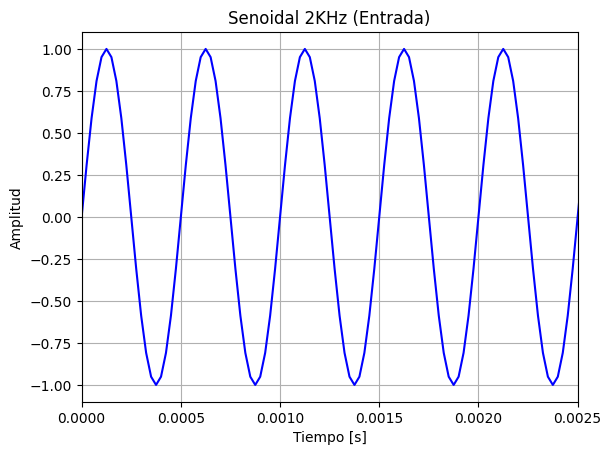

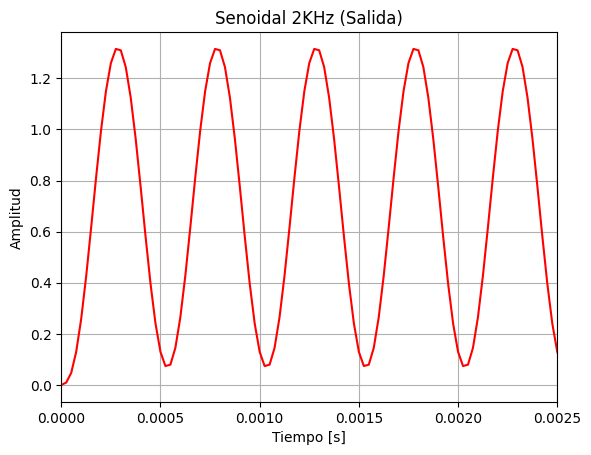

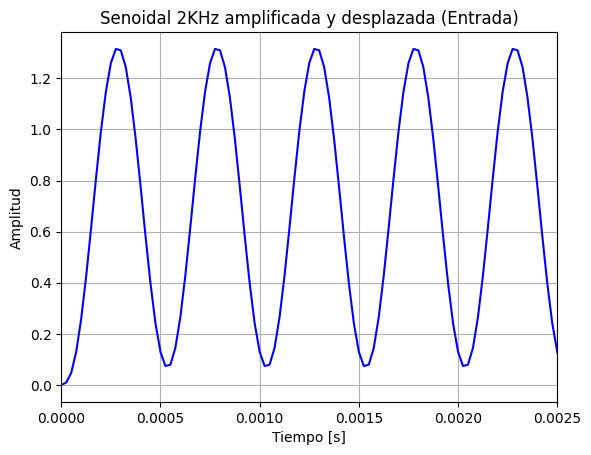

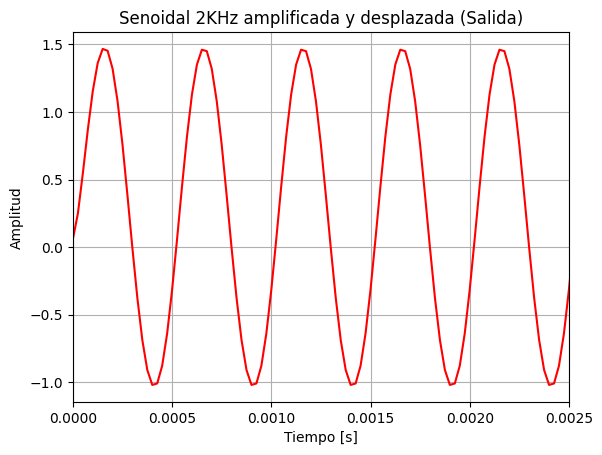

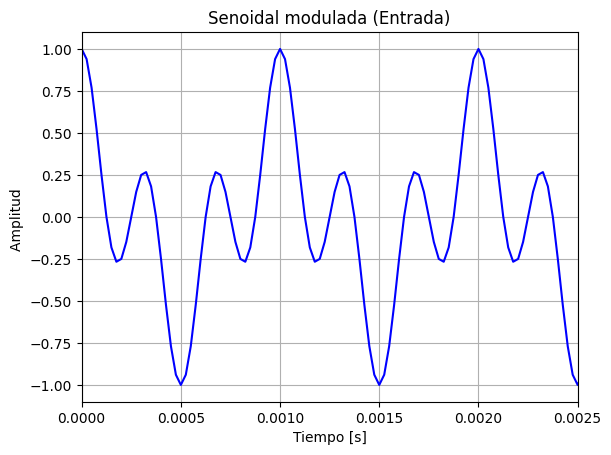

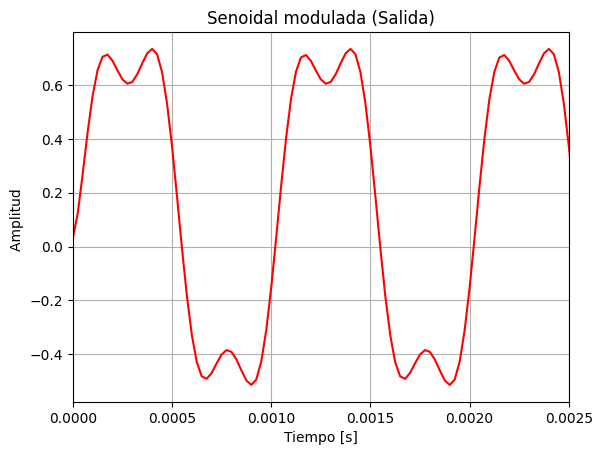

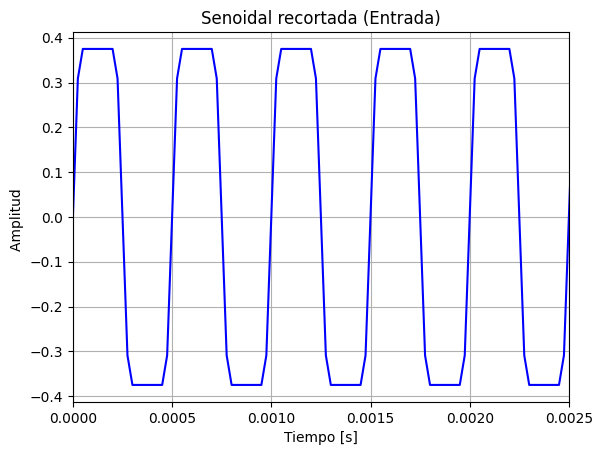

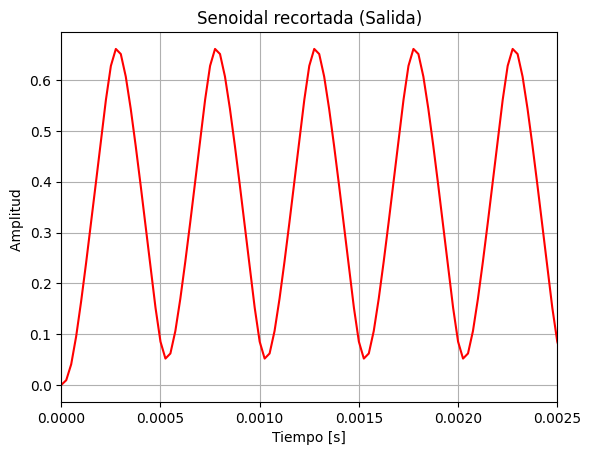

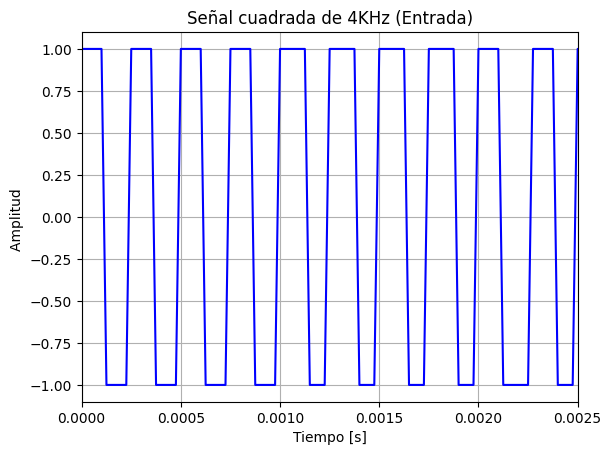

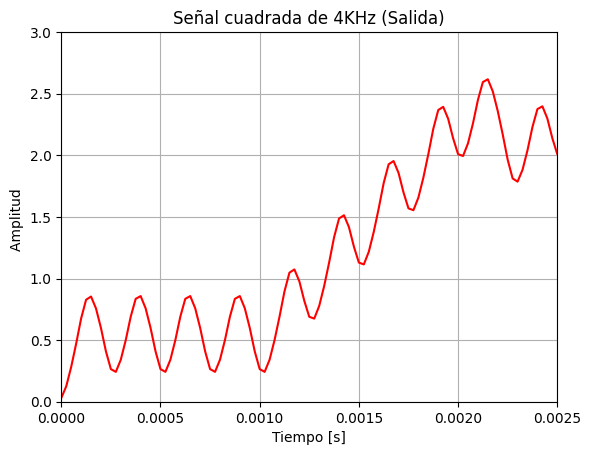

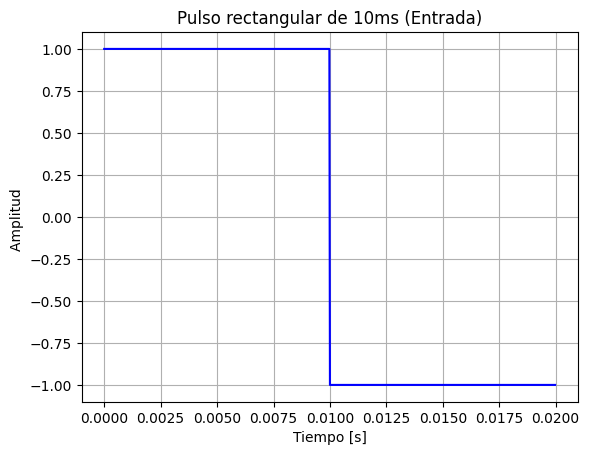

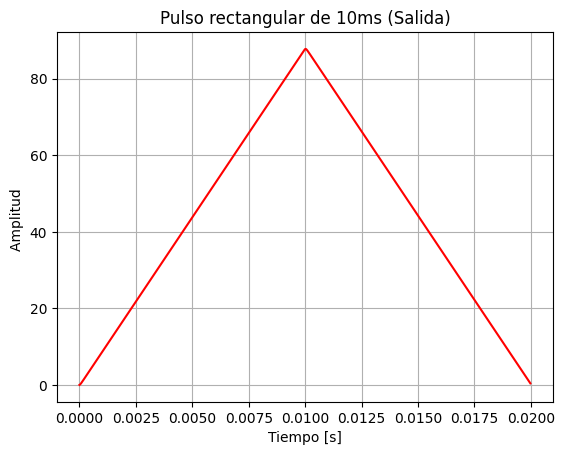

In [8]:
# Señal senoidal 2 KHz
plt.figure()
plt.plot(t1, x1, color='blue')
plt.title('Senoidal 2KHz (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y1, color='red')
plt.title('Senoidal 2KHz (Salida)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.0025)
plt.ylabel('Amplitud')
plt.grid(True)


# Señal senoidal 2KHz amplificada y desplazada
plt.figure()
plt.plot(t1, y1, color='blue')
plt.title('Senoidal 2KHz amplificada y desplazada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y2, color='red')
plt.title('Senoidal 2KHz amplificada y desplazada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal senoidal modulada
plt.figure()
plt.plot(t3, x3, color='blue')
plt.title('Senoidal modulada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t3, y3, color='red')
plt.title('Senoidal modulada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal senoidal recortada
plt.figure()
plt.plot(t1, x4, color='blue')
plt.title('Senoidal recortada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y4, color='red')
plt.title('Senoidal recortada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal cuadrada de 4KHz
plt.figure()
plt.plot(t5, x5, color='blue')
plt.title('Señal cuadrada de 4KHz (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t5, y5, color='red')
plt.title('Señal cuadrada de 4KHz (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.xlim(0, 0.0025)
plt.ylim(0, 3)
plt.grid(True)


# Pulso rectangular de 10 ms
plt.figure()
plt.plot(t6, x6, color='blue')
plt.title('Pulso rectangular de 10ms (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.grid(True)

plt.figure()
plt.plot(t6, y6, color='red')
plt.title('Pulso rectangular de 10ms (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud ')
plt.grid(True)


En esta parte se encuentra la respuesta al impulso, se grafica y se convoluciona con la primer señal de entrada para corroborar que den el mismo resultado

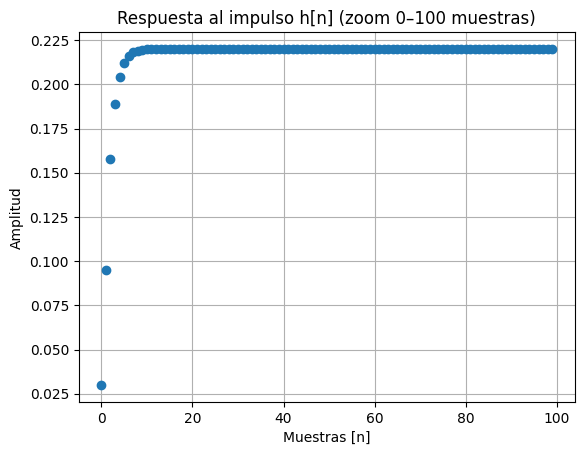

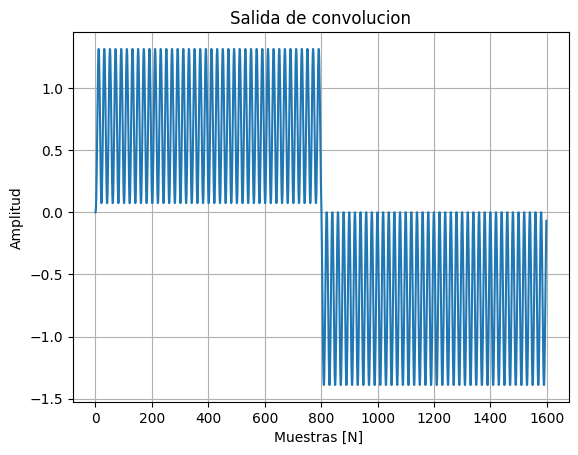

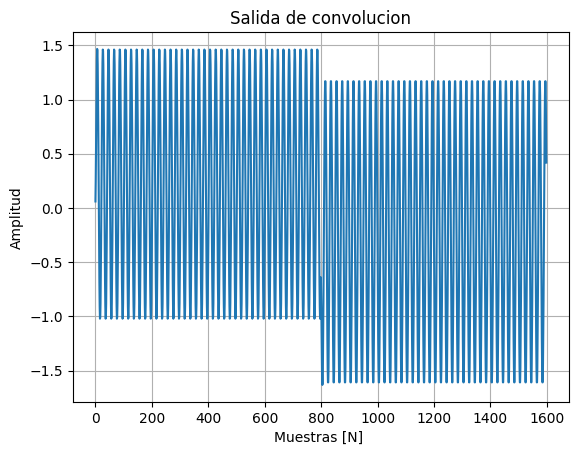

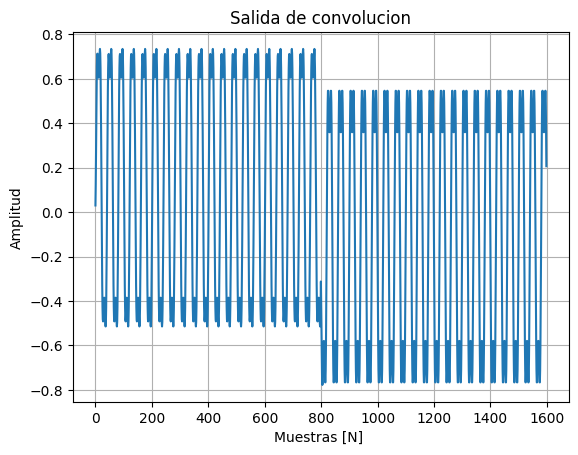

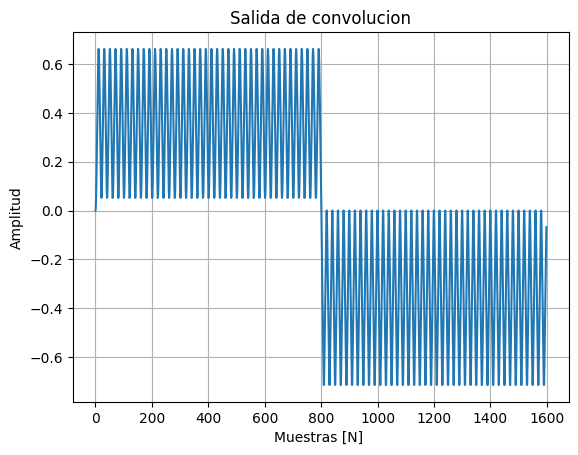

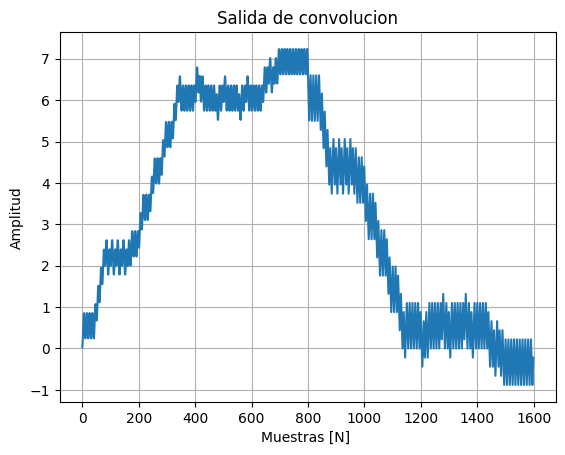

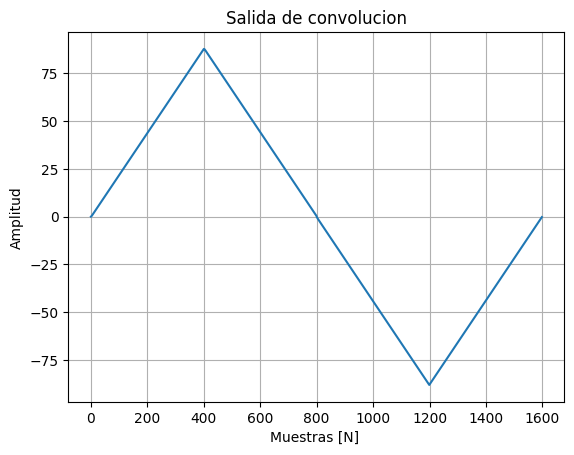

In [10]:
delta = np.zeros(N)
delta[0] = 1.0
h = sig.lfilter(b, a, delta)
# === NUEVO: salidas por CONVOLUCIÓN para TODAS las entradas (recorto a N) ===
def y_conv(x):
    yc = np.convolve(x, h, mode='full')
    return yc[:len(x)]   # causal y mismo largo que x

y1c = y_conv(x1)
y2c = y_conv(x2)
y3c = y_conv(x3)
y4c = y_conv(x4)
y5c = y_conv(x5)
y6c = y_conv(x6)
plt.figure()
n_zoom = min(100, len(h))
plt.plot(np.arange(n_zoom), h[:n_zoom], 'o')
plt.title("Respuesta al impulso h[n] (zoom 0–100 muestras)")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)

Yx1h = np.convolve(x1, h)
Yx2h = np.convolve(x2, h)
Yx3h = np.convolve(x3, h)
Yx4h = np.convolve(x4, h)
Yx5h = np.convolve(x5, h)
Yx6h = np.convolve(x6, h)

plt.figure()
plt.plot(Yx1h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()  

plt.figure()
plt.plot(Yx2h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(Yx3h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(Yx4h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(Yx5h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(Yx6h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()  


Aca se definió una senoidal de 200 Hz, y se busco la respuesta al impulso y salida de los siguientes sistemas:
$$
\begin{aligned}
\text{1} \quad & y[n] = x[n] + 3 \cdot x[n-10] \\
\text{2} \quad & y[n] = x[n] + 3 \cdot y[n-10]
\end{aligned}
$$



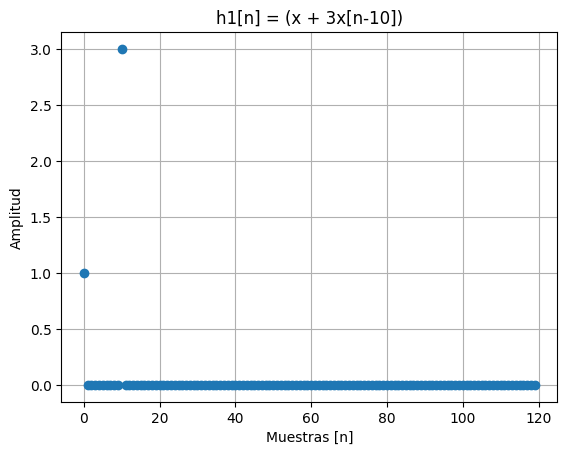

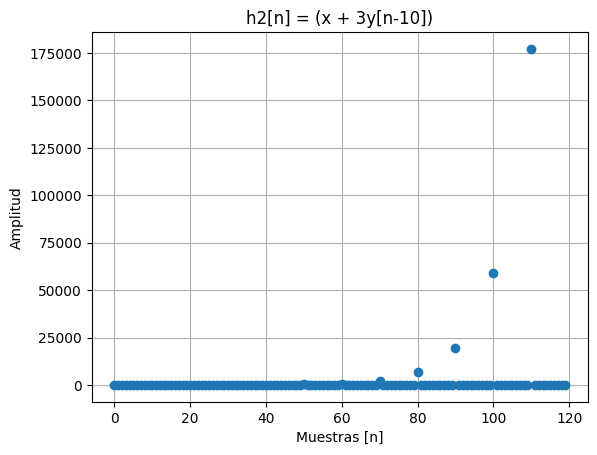

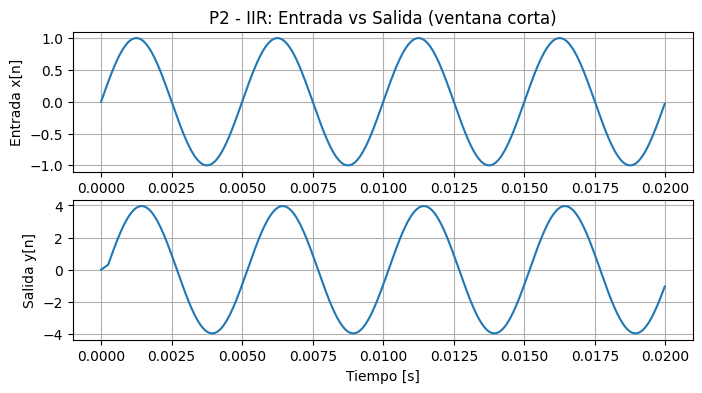

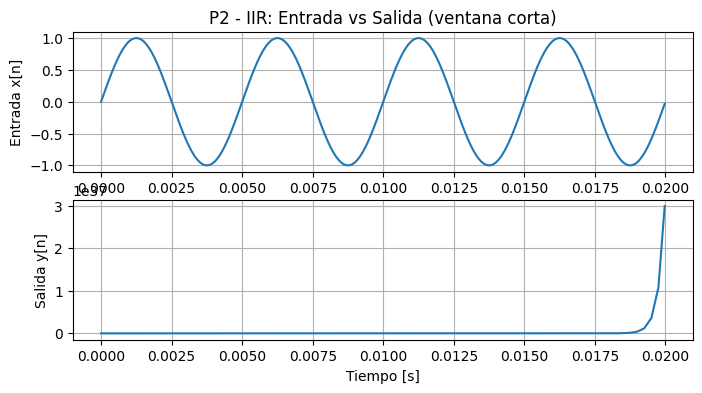

In [18]:
# === PUNTO 2 (idéntico a tu base, con fix de signo en a[10]) ===
f4 = 200
t7, x7 = sen(fs=fs1, nn=N, ff=f4)

# Sistema 1: y[n] = x[n] + 3 x[n-10]  (FIR)
c = np.zeros(11); c[0] = 1; c[10] = 3
d = np.array([1.0])
Y1 = sig.lfilter(c, d, x7)

# Respuesta al impulso del sist. 1
imp = np.zeros(N); imp[0] = 1
h1 = sig.lfilter(c, d, imp)

# Sistema 2: y[n] = x[n] + 3 y[n-10]  (IIR)
# En lfilter: a[0]=1 y a[10] = -3  => y[n] - 3 y[n-10] = x[n]
e = np.array([1.0])
f = np.zeros(11); f[0] = 1; f[10] = -3
Y2 = sig.lfilter(e, f, x7)
h2 = sig.lfilter(e, f, imp)


plt.figure()
m_zoom = min(120, len(h1))
plt.plot(np.arange(m_zoom), h1[:m_zoom], 'o')
plt.title("h1[n] = (x + 3x[n-10])")
plt.xlabel("Muestras [n]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.figure()
m_zoom = min(120, len(h2))
plt.plot(np.arange(m_zoom), h2[:m_zoom], 'o')
plt.title("h2[n] = (x + 3y[n-10])")
plt.xlabel("Muestras [n]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(t7, x7)
plt.title("P2 - IIR: Entrada vs Salida (ventana corta)")
plt.ylabel("Entrada x[n]")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(t7, Y1)
plt.xlabel("Tiempo [s]"); plt.ylabel("Salida y[n]")
plt.grid(True)
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(t7, x7)
plt.title("P2 - IIR: Entrada vs Salida (ventana corta)")
plt.ylabel("Entrada x[n]")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(t7, Y2)
plt.xlabel("Tiempo [s]"); plt.ylabel("Salida y[n]")
plt.grid(True)


### Conclusiones

En este trabajo se estudiaron distintos sistemas LTI (Lineales e Invariantes en el Tiempo y su comportamiento frente a señales de entrada de diversa naturaleza.  
Se verificó experimentalmente que cumplen las propiedades fundamentales de linealidad e invariancia temporal, la salida se escala de forma proporcional al escalar la entrada, y un desplazamiento temporal en la señal de entrada produce un desplazamiento equivalente en la salida, sin alterar su forma.

Al aplicar diferentes tipos de señales se observó cómo la respuesta del sistema depende de las características espectrales de cada una.  
En particular, se apreció que las componentes de frecuencia del sistema determinan la atenuación o amplificación selectiva de las señales, modificando su forma en el dominio temporal.

Por otro lado, se comprobó que la salida obtenida mediante la función `lfilter` y la obtenida por convolución con la respuesta al impulso difieren cuando el sistema es IIR  
Esto ocurre porque la convolución se realiza sobre un \( h[n] \) truncado, mientras que el sistema IIR posee una respuesta al impulso de duración infinita debido a su retroalimentación interna  
Al truncar \( h[n] \), se pierde parte de esa retroalimentación, generando una discrepancia entre ambas salidas.  
Cuando se amplía la longitud de \( h[n] \) (por ejemplo, a varias veces el tamaño de la señal), las salidas por convolución y por `lfilter` se vuelven prácticamente idénticas.

En conjunto, el trabajo permitió comprender de forma práctica cómo los sistemas LTI procesan señales y cómo la representación mediante su respuesta al impulso permite predecir su comportamiento frente a cualquier estímulo.



# Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

**Resolví la tarea, pero tengo dudas**

Resolví la tarea,pero no entendí bien

No pude resolverla y no entendí

Responder:

¿Qué aprendiste al hacer esta tarea?

Aprendi a como sacar el impulso

¿Qué te quedó claro? ¿Qué te sigue costando?

sacar h[n], aun tengo dudas del grafico de convolucion y lfilter

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.** 

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

**Conclusiones**.
